In [26]:
import pandas as pd
hospital_data=pd.read_csv('hospitals.csv')
hospital_data.columns.values[0] = "State/UT"
hospital_data.to_csv("hospitals_modified.csv", index=False)


In [27]:
hospital_df = pd.read_csv('hospitals_modified.csv')

fullname = {
    "PHC": "Number of Primary Health Centers",
    "CHC": "Community Health Centers",
    "SDH": "Sub-District/Divisional Hospitals",
    "DH": "District Hospitals",
    "Hospitals": "Hospitals",
    "HospitalBeds": "Hospital Beds"
}

hospital_df.rename(columns=fullname, inplace=True)

hospital_df.rename(columns={hospital_df.columns[0]: 'State/UT'}, inplace=True)

hospital_df.to_csv('hospitals_fixed.csv',index=False)

In [12]:
import pandas as pd
import os

def fix_state_ut_names(data):

    state_ut_mapping = {
        'A&N Islands': 'Andaman and Nicobar Islands',
        'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
        'D&N Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'NCT of Delhi': 'Delhi',
        'NCT OF DELHI': 'Delhi',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Jammu & Kashmir': 'Jammu and Kashmir',
        'Lakshadweep': 'Lakshadweep',
        'Odisha': 'Odisha',
        'Puducherry': 'Puducherry',
        'Uttaranchal': 'Uttarakhand',
        'AN Islands': 'Andaman and Nicobar Islands',
        'Chandigarh': 'Chandigarh',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Pondicherry': 'Puducherry',
    }

    # Apply mapping to fix State/UT names
    data['State/UT'] = data['State/UT'].map(state_ut_mapping).fillna(data['State/UT'])
    return data

hospital_data = pd.read_csv('hospitals_fixed.csv')

hospital_data_fixed = fix_state_ut_names(hospital_data)

output_folder = 'Clean_Data'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'all_hospitals.csv')
hospital_data_fixed.to_csv(output_file, index=False)

0         1246
1        60799
2         2320
3        19115
4        17796
5         3756
6        14354
7          568
8          298
9        20572
10        2666
11       41129
12       13841
13        8706
14       11342
15        7404
16       56333
17       39511
18         250
19       38140
20       68998
21        2562
22        4585
23        2312
24        1944
25       16497
26        4462
27       13527
28       51844
29        1145
30       72616
31       17358
32        4895
33       58310
34        6660
35       51163
36    7,39,024
Name: HospitalBeds, dtype: object


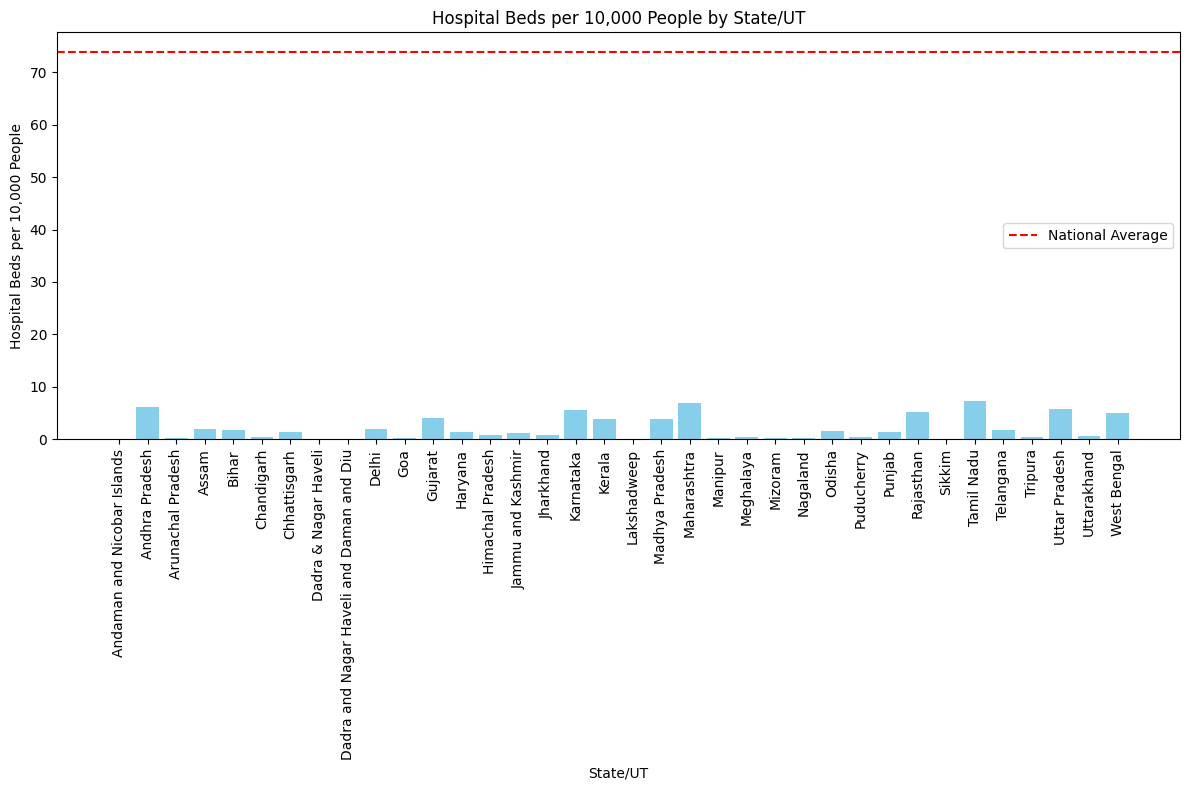

States/UTs with the least amount of beds for their population:
                                    State/UT  Beds_Per_10000_People
18                               Lakshadweep                 0.0250
8   Dadra and Nagar Haveli and Daman and Diu                 0.0298
7                       Dadra & Nagar Haveli                 0.0568


In [36]:
import matplotlib as plt
df = pd.read_csv('Clean_Data/all_hospitals.csv')
df['Hospital Beds'] = pd.to_numeric(df['Hospital Beds'], errors='coerce')#converting data into numeric to calculate per 10000

# Remove rows with missing or invalid values
df.dropna(subset=['Hospital Beds'], inplace=True)


# Calculate hospital beds per 10,000 people
df['Beds_Per_10000_People'] = df['Hospital Beds'] / 10000
national_average=df['Hospital Beds'].sum()/10000

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(df['State/UT'], df['Beds_Per_10000_People'], color='skyblue')
plt.axhline(national_average, color='red', linestyle='--', label='National Average')
plt.xlabel('State/UT')
plt.ylabel('Hospital Beds per 10,000 People')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Identify three States/UTs with the least amount of beds for their population
lowest_beds_states = df.nsmallest(3, 'Beds_Per_10000_People')[['State/UT', 'Beds_Per_10000_People']]
print("States/UTs with the least amount of beds for their population:" )
print(lowest_beds_states)


In [30]:
# Reading the csv file
df = pd.read_csv("government_hospitals.csv", skiprows=2)
print(df)



# Define the new column names
new_column_names = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
                    'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

# Assign the new column names to the DataFrame
df.columns = new_column_names

# Save the DataFrame with updated column names to a new CSV file
df.to_csv('updated_government_hospitals.csv', index=False)


               Andhra Pradesh    193    6480    65   16658  01.01.2017
0          Arunachal Pradesh*    208    2136    10     268  31.12.2017
1                       Assam   1176   10944    50    6198  31.12.2017
2                       Bihar    930    6083   103    5936  31.12.2016
3                Chhattisgarh    169    5070    45    4342  01.01.2016
4                        Goa*     17    1405    25    1608  31.12.2017
5                     Gujarat    364   11715   122   20565  31.12.2016
6                    Haryana*    609    6690    59    4550  31.12.2016
7           Himachal Pradesh*    705    5665    96    6734  31.12.2017
8             Jammu & Kashmir     56    7234    76    4417  30.12.2016
9                   Jharkhand    519    5842    36    4942  31.12.2015
10                 Karnataka*   2471   21072   374   49093  31.12.2017
11                     Kerala    981   16865   299   21139  01.01.2017
12             Madhya Pradesh    334   10020   117   18819  01.01.2016
13    

In [1]:
# Reading the csv file
df = pd.read_csv("government_hospitals.csv", skiprows=2)
print(df)


# Define the new column names
new_column_names = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
                    'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

# Assign the new column names to the DataFrame
df.columns = new_column_names

# Convert date format in the "Last_Updated" column
df['Last_Updated'] = pd.to_datetime(df['Last_Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')


# Save the updated DataFrame to a new CSV file in the "Clean" folder
clean_file_path = 'Clean_Data/government_hospitals.csv'
df.to_csv(clean_file_path, index=False)



# Save the DataFrame with updated column names to a new CSV file
df.to_csv('updated_government_hospitals.csv', index=False)



#Abhinav  Krishna
#22BTRCL005
def fix_state_ut(data):

    state_ut= {
        'A&N Islands': 'Andaman and Nicobar Islands',
        'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
        'D&N Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'NCT of Delhi': 'Delhi',
        'NCT OF DELHI': 'Delhi',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Jammu & Kashmir': 'Jammu and Kashmir',
        'Lakshadweep': 'Lakshadweep',
        'Odisha': 'Odisha',
        'Puducherry': 'Puducherry',
        'Uttaranchal': 'Uttarakhand',
        'AN Islands': 'Andaman and Nicobar Islands',
        'Chandigarh': 'Chandigarh',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Pondicherry': 'Puducherry',
    }

    data['State/UT'] = data['State/UT'].map(state_ut).fillna(data['State/UT'])
    return data

hospital_data_fixed= fix_state_ut(df)
hospital_data_fixed.to_csv('Clean_Data/government_hospitals.csv', index=False)



               Andhra Pradesh    193    6480    65   16658  01.01.2017
0          Arunachal Pradesh*    208    2136    10     268  31.12.2017
1                       Assam   1176   10944    50    6198  31.12.2017
2                       Bihar    930    6083   103    5936  31.12.2016
3                Chhattisgarh    169    5070    45    4342  01.01.2016
4                        Goa*     17    1405    25    1608  31.12.2017
5                     Gujarat    364   11715   122   20565  31.12.2016
6                    Haryana*    609    6690    59    4550  31.12.2016
7           Himachal Pradesh*    705    5665    96    6734  31.12.2017
8             Jammu & Kashmir     56    7234    76    4417  30.12.2016
9                   Jharkhand    519    5842    36    4942  31.12.2015
10                 Karnataka*   2471   21072   374   49093  31.12.2017
11                     Kerala    981   16865   299   21139  01.01.2017
12             Madhya Pradesh    334   10020   117   18819  01.01.2016
13    